# CDalgs - Community detection algorithms

There is an overview of four algorithms for community dentection on undirected graphs. 
- ModMax - modularity maximisation of the whole graph. 
- Louvain method - hierarchically based modularity maximisation. 
- CDEP algorithm - the third one performs graph compression and seeding expansion. 
- NCClustering - greedy approach of near clique (dense subgraphs) clustering.


Load libraries

In [1]:
using CDalgs
using MLDatasets
using LinearAlgebra, StatsBase
using Graphs, SimpleWeightedGraphs
using Plots

Load dataset & define clustering and graph methods

In [2]:
dataset = MNIST(:train).features
#clustering = g -> modmax_clustering(g) 
#clustering = g -> louvain_clustering(g) 
#clustering = g -> cdep_clustering(g) 
clustering = g -> nc_clustering(g)
create_graph = d -> correlation_graph(d)

#3 (generic function with 1 method)

Prepare data and correlation graph

In [3]:
n= size(dataset)[1]

data_vec = collect(hcat(
    map(x -> vec(x), eachslice(dataset, dims=3))...
)')

@show size(data_vec)
    
g = create_graph(data_vec)

size(data_vec) = (60000, 784)


{784, 165105} undirected simple Int64 graph with Float64 weights

Perform community detection (graph clustering)

In [4]:
clusters = clustering(g)
clusters_matrix = transpose(reshape(clusters, (n, n)))

28×28 transpose(::Matrix{Int64}) with eltype Int64:
 54  54  54  54  54  54  54  54  54  …  54  54  54  54  54  54  54  54  54
 54  54  54  54  54  54  49  39   6     37  37  37  38  54  54  54  54  54
 54  54  54  54  17  45  45  45   6     18  13  46  46  46  46  46  54  54
 54  54  54  17  17  45  45   6  14     34  18  18  13  46  46  46  54  54
 54  54  32  12  45  45  45  34  34      5  14  18  18  18  26  26  26  54
 54  54  32  12  45  45  45  45  14  …   5   5  14   5  18  19  26  26  50
 54  54  40  12  45  45  45  45  14      5   5   5   5   5  19  18  50  50
 54  40  25  25  18  45  35  34  34      5   5   5   5   5  19  18  20  47
 54  25  25  18  11  11   5   5   5      5   5   5   5   5  18  18  20   7
 54  25  25  18   5   5   5   5   5     51   5   5   5   5  18  18  20   7
 54  25  25  18   5   5   5   5   5  …   5   5   5   5   5  18  43  20   7
 54  42  42  18  11   5   5   5   5      5   5   5   5   5  18  43  43  30
 54  42  42  11  11  11   5   5   5      5   5  

Create color map

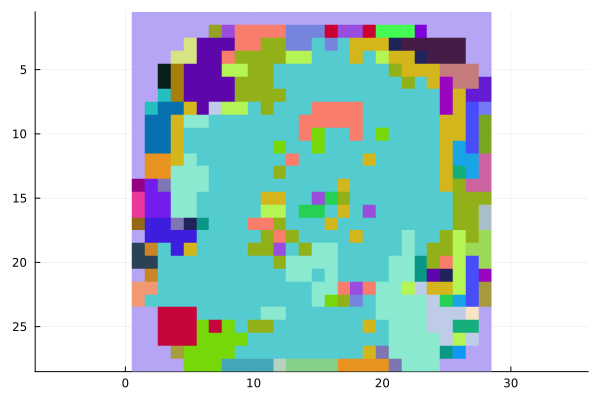

In [5]:
clusters_matrix_colors = fill(RGB(0, 0, 0), (n, n))
colors_vec = map(x->RGB(rand(1)[1], rand(1)[1], rand(1)[1]), 1:length(unique(clusters)))
for i::Int64=1:n for j::Int64=1:n
    clusters_matrix_colors[i, j] = colors_vec[clusters_matrix[i, j]]
end end
plot(clusters_matrix_colors)

Compare clustering of different methods

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs /Users/kozvojtex/.julia/packages/SimpleWeightedGraphs/E0rMD/src/simpleweightedgraph.jl:123


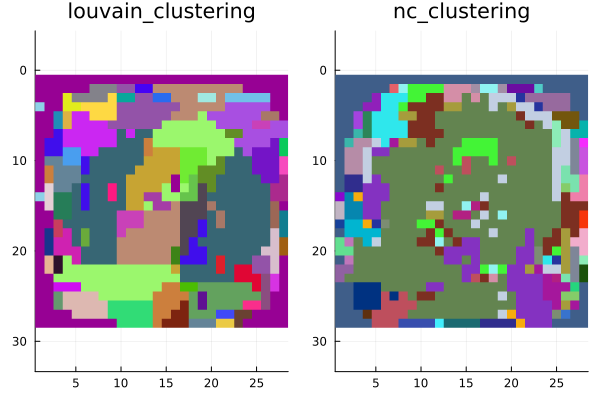

In [6]:
function clusterdataset(dataset::T, clustering::Function,
    graph::Function) where T<:AbstractArray

    n::Int64 = size(dataset)[1]

    data_vec::Matrix = collect(hcat(
    map(x -> vec(x), eachslice(dataset, dims=3))...
    )')

    g::SimpleWeightedGraph = graph(data_vec)

    clusters::Vector{Int64} = clustering(g)
    clusters_matrix::Matrix{Int64} = transpose(reshape(clusters, (n, n)))

    clusters_matrix_colors = fill(RGB(0, 0, 0), (n, n))
    colors_vec = map(x->RGB(rand(1)[1], rand(1)[1], rand(1)[1]), 1:length(unique(clusters)))
    for i::Int64=1:n for j::Int64=1:n
    clusters_matrix_colors[i, j] = colors_vec[clusters_matrix[i, j]]
    end end
    clusters_matrix, plot(clusters_matrix_colors, title=String(Symbol(clustering)))
end

dataset = MNIST(:train).features

imgs = []
#append!(imgs, [clusterdataset(dataset, modmax_clustering, d->correlation_graph(d))[2]])
append!(imgs, [clusterdataset(dataset, louvain_clustering, d->correlation_graph(d))[2]])
#append!(imgs, [clusterdataset(dataset, cdep_clustering, d->correlation_graph(d))[2]])
append!(imgs, [clusterdataset(dataset, nc_clustering, d->correlation_graph(d))[2]])

plot(imgs..., layout=(1, 2))